<a href="https://colab.research.google.com/github/bani1610/Machine-Learning-Praktikum/blob/main/regresi01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/praktikum-ml/Praktikum03/Data"

In [ ]:
import pandas as pd

df = pd.read_csv(path + "/socr.csv", sep=",")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [ ]:
# Konversi Data menjadi satuan CM dan KG

In [ ]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(tinggi_cm=lambda x: x["tinggi_cm"] * 2.54,
            berat_kg=lambda x: x["berat_kg"] * 0.453
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()
df1.head()

,tinggi_cm,berat_kg
0,167.09,51.19
1,181.65,61.83
2,176.27,69.32
3,173.27,64.48
4,172.18,65.37


# Membagi dataset untuk Training dan Test


In [ ]:
from sklearn.model_selection import train_test_split

# variabel Independent/bebas
X = df1[["tinggi_cm"]]
# Variabel dependent/terikat
y = df1["berat_kg"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


# Pemodelan data : dengan data training

In [ ]:
from sklearn.linear_model import LinearRegression

#Buat Object model instan dari class LinearRegression
model = LinearRegression()
#lakukan proses training
model.fit(X_train, y_train)

LinearRegression()

# Evaluasi Model

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

metrics = {
    "R2": [r2],
    "Koefisien (Kg/cm)": [model.coef_[0]],
    "Intercept (Kg)": [model.intercept_],
    "MAE (kg)": [mean_absolute_error(y_test, y_pred)]
}
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
metrics["MSE (kg)"] = [mse]
metrics["RNSE (kg)"] = [rmse]

df_resume = pd.DataFrame(metrics)
df_resume

,R2,Koefisien (Kg/cm),Intercept (Kg),MAE (kg),MSE (kg),RNSE (kg)
0,0.249887,0.551106,-37.608581,3.665668,21.187881,4.60303


# Cetak Persamaan Regresi

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Persamaan Regresi: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan Regresi: y = 0.551 * x + -37.609


In [ ]:
y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error/aktual|)), dibatasi 0-100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.10,58.686201,8.586201,82.861875
1,171.31,50.26,56.801418,6.541418,86.984844
2,169.29,58.14,55.688183,-2.451817,95.782909
3,163.30,58.84,52.387057,-6.452943,89.033068
4,170.52,62.98,56.366044,-6.613956,89.498323
...,...,...,...,...,...
4995,178.75,56.52,60.901647,4.381647,92.247616
4996,163.05,47.39,52.249281,4.859281,89.746190
4997,166.51,52.39,54.156108,1.766108,96.628922
4998,167.70,49.83,54.811924,4.981924,90.002159


Text(0.02, 0.98, 'y = 0.551 * x + -37.609\n$R^2$ = 0.250')

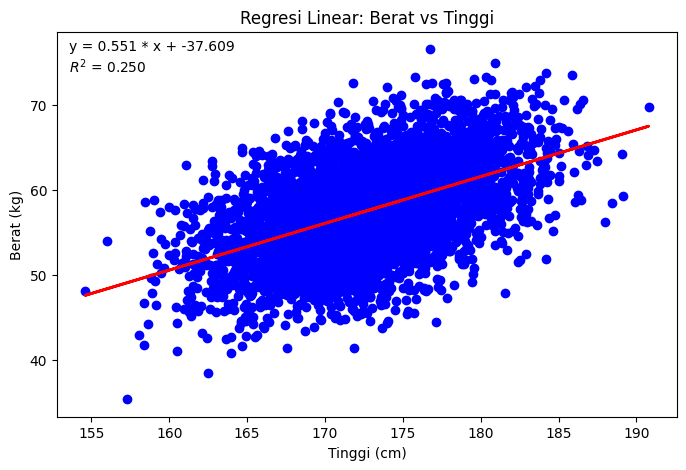

In [ ]:
import matplotlib.pyplot as plt

# Menyiapkan kanvas/area untuk plot
plt.figure(figsize=(8, 5))

# Plot data aktual dalam bentuk titik (scatter plot)
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

# Menggambar garis regresi hasil prediksi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")

plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")

plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)


# Data Testing

In [ ]:
import pandas as pd

df2= pd.read_csv(path + "/Book1.csv", sep=",")
df2

,No,nama,tinggi_cm,actual_berat
0,1,Fafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Kayla,160,70.3
4,5,Bani,183,65.8


# adata

In [ ]:
X_testing = df2[['tinggi_cm']]
X_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [ ]:

y_pred_book1 = model.predict(df2[['tinggi_cm']])

df2['predicted_berat_kg'] = y_pred_book1

df2['selisih_berat_kg'] = df2['actual_berat'] - df2['predicted_berat_kg']

denom = df2["actual_berat"].replace(0, np.nan)
df2["Akurasi (%)"] = (1 - (df2["selisih_berat_kg"].abs() / denom)).clip(lower=0, upper=1) * 100

display(df2)

,No,nama,tinggi_cm,actual_berat,predicted_berat_kg,selisih_berat_kg,Akurasi (%)
0,1,Fafa,168,58.5,54.977256,3.522744,93.978216
1,2,Tiara,162,78.2,51.670619,26.529381,66.074961
2,3,Tia,155,52.7,47.812876,4.887124,90.726520
3,4,Kayla,160,70.3,50.568407,19.731593,71.932300
4,5,Bani,183,65.8,63.243849,2.556151,96.115272


In [ ]:
df2.describe()

,No,tinggi_cm,actual_berat,predicted_berat_kg,selisih_berat_kg,Akurasi (%)
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,165.600000,65.100000,53.654601,11.445399,83.765453
std,1.581139,10.784248,9.955652,5.943265,10.965693,13.768188
min,1.000000,155.000000,52.700000,47.812876,2.556151,66.074961
25%,2.000000,160.000000,58.500000,50.568407,3.522744,71.932300
50%,3.000000,162.000000,65.800000,51.670619,4.887124,90.726520
75%,4.000000,168.000000,70.300000,54.977256,19.731593,93.978216
max,5.000000,183.000000,78.200000,63.243849,26.529381,96.115272


# model multiple regresi linear

